# Regresión lineal Simple en Python

#### Se realizará con el paquete de StatsModel

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
matplotlib.style.use("ggplot")
%config IPCompleter.greedy=True

In [2]:
data = pd.read_csv("../datasets/ads/Advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
lm = smf.ols(formula='Sales~TV',data=data).fit()

In [4]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [5]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 15 Aug 2019   Prob (F-statistic):           1.47e-42
Time:                        00:32:12   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
lm1 = smf.ols(formula="Sales~TV",data=data)
lm1.fit() # Si lo hacemos de esta manera no le podemos pedir los parámetros

## El modelo lineal predictivo sería Sales= 7.032594+ 0.047537*TV
* Por cada 100 euros gastados en publicidad televisiva se venden 4.7 productos más.

In [7]:
lm.pvalues # Menores que nuestro valores de significancia

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [8]:
lm.rsquared

0.611875050850071

In [9]:
lm.rsquared_adj

0.6099148238341623

In [10]:
sales_pred = lm.predict(data.TV).values

In [11]:
sales_pred[:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [12]:
metrics.r2_score(data.Sales,sales_pred), metrics.mean_squared_error(data.Sales,sales_pred)

(0.611875050850071, 10.512652915656757)

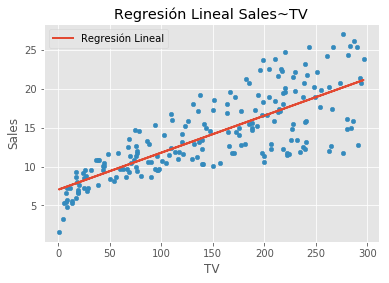

In [13]:
data.plot(kind="scatter",x="TV",y="Sales")
plt.plot(data.TV.values,sales_pred,lw=2,label="Regresión Lineal")
plt.legend(loc="best")
plt.title("Regresión Lineal Sales~TV")
plt.show()

In [14]:
data["Sales_Pred"] = lm.params[0]+lm.params[1]*data.TV

In [15]:
data["RSE"] = (data.Sales-data.Sales_Pred)**2 # Error estádar Residual

In [16]:
SSD = sum(data.RSE)
SSD

2102.5305831313503

In [17]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

3.258656368650462

In [18]:
sales_promedio = np.mean(data.Sales)
sales_promedio

14.022500000000003

In [19]:
error = RSE/sales_promedio

In [20]:
error # Porcetanje de error con respecto la media

0.23238768897489473

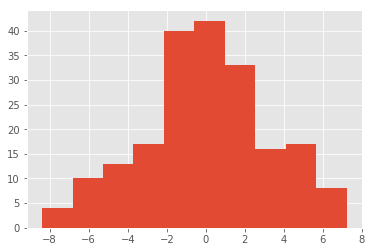

In [21]:
plt.hist(data.Sales-data.Sales_Pred)
plt.show()

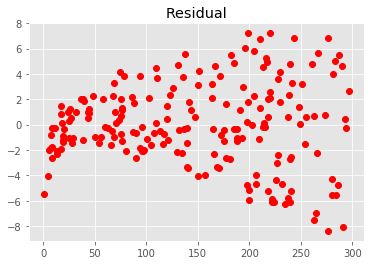

In [22]:
plt.plot(data.TV,(data.Sales-data.Sales_Pred),"ro")
plt.title("Residual")
plt.show()
# Hay un pequeño patrón en los residuales.

# Regresión Lineal Multiple 

### Utilizar el paquete statsmodel para regresión múltiple
* Sales~TV
* Sales~Newspaper
* Sales~Radio
* Sales~TV~Newspaper
* Sales~TV~Radio
* Sales~Radio~TV
* Sales~Radio~Newspaper
* Sales~Newspaper~TV
* Sales~Newspaper~Radio
* Sales~TV~Radio~Newspaper
* Sales~Radio~TV~Newspaper
* Sales~Newspaper~TV~Radio

In [23]:
# Añadir el Newspaper al modelo existente
lm2 = smf.ols(formula="Sales~TV+Newspaper",data=data).fit()

In [24]:
lm2.summary2(title="Regresión Lineal ")

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Regresión Lineal 
==================================================================
Model:              OLS              Adj. R-squared:     0.642    
Dependent Variable: Sales            AIC:                1025.7782
Date:               2019-08-15 00:32 BIC:                1035.6731
No. Observations:   200              Log-Likelihood:     -509.89  
Df Model:           2                F-statistic:        179.6    
Df Residuals:       197              Prob (F-statistic): 3.95e-45 
R-squared:          0.646            Scale:              9.7389   
--------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept     5.7749     0.5253   10.9928   0.0000   4.7389   6.8110
TV            0.0469     0.0026   18.1727   0.0000   0.0418   0.0520
Newspaper     0.0442     0.0102    4.3463   0.0000   0.0242   0.0643
------------------------------------------------------------------
Omnibus:              0.658         Durbin-Watson:           1.969
Prob(Omnibus):        0.720         Jarque-Bera (JB):        0.415
Skew:                 -0.093        Prob(JB):                0.813
Kurtosis:             3.122         Condition No.:           410  
==================================================================

"""

##### Modelo predictor de ventas Sales=5.774948+0.046901*TV+ 0.044219*Newspaper

In [25]:
sales_predictor= lm2.predict(data[["TV","Newspaper"]])
sales_predictor.head()

0    19.626901
1     9.856348
2     9.646055
3    15.467318
4    16.837102
dtype: float64

In [26]:
SSD = np.sum((data.Sales-sales_predictor)**2)

In [27]:
SSD

1918.5618118968275

In [28]:
RSE = np.sqrt(SSD/(data.shape[0]-2-1)) # Menos uno por la var. adicional.
RSE

3.1207198602528856

In [29]:
np.mean(data.Sales)

14.022500000000003

In [30]:
RSE/np.mean(data.Sales)

0.2225508903728212

In [31]:
# Crear ahora Sales = B0+B1*TV+B2*Newspaper+TV*Newspaper
lm3= smf.ols(formula='Sales~TV+Radio+TV*Radio', data=data).fit()

In [32]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 15 Aug 2019   Prob (F-statistic):          6.68e-146
Time:                        00:32:16   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### $\text{Regresión Lineal Multiple encontrada } \hat{y} = 6.7502 + 0.0191\cdot TV + 0.0289\cdot Radio + 0.0011\cdot TV \cdot Radio$

In [33]:
sales_predictor_interceptor = lm3.predict(data[["TV","Radio"]])

In [34]:
SSD = np.sum((data.Sales-sales_predictor_interceptor)**2)
SSD

174.4833826277272

In [35]:
colors = ["red","blue","orange","gold","purple"]*40

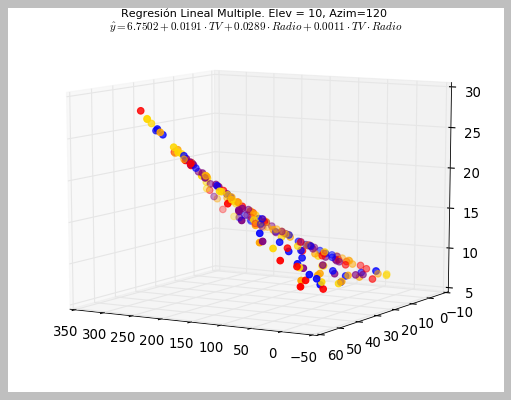

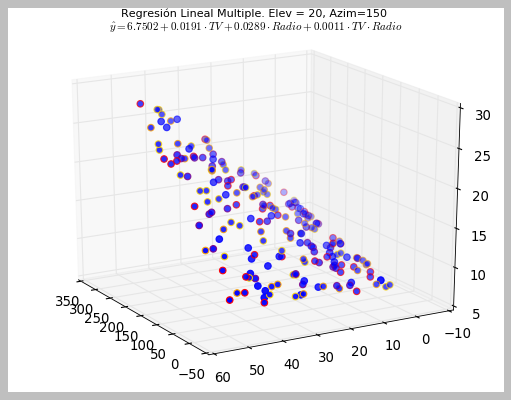

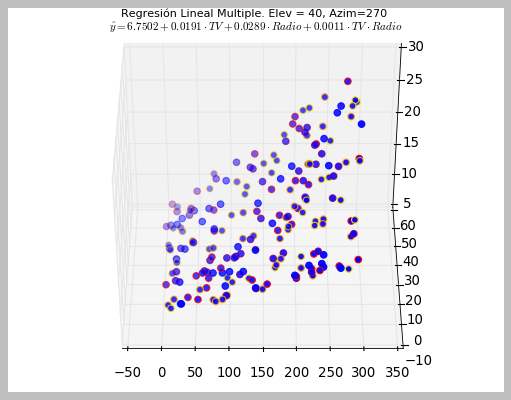

In [36]:
# Los datos en una visualización 3D. Los mismo datos, pero con una elevación distinta
# Params scatter3D self, x, y, s, c, marker, cmap, norm, vmin, vmax, alpha, linewidths, verts, edgecolors, **kwargs)
from mpl_toolkits import mplot3d
matplotlib.style.use("classic")
plt.subplots(1,3,sharex='none',sharey='none')
ax=plt.subplot(projection='3d')
ax.scatter3D(data.TV,data.Radio,sales_predictor_interceptor,c=colors,edgecolors=colors,s=35)
ax.view_init(elev=10,azim=120) # Elev es la elevación de donde se mira, azim gira de manera hizontal y elev de manera vertical
ax.set_title("Regresión Lineal Multiple. Elev = 10, Azim=120 \n"+ r"$\hat{y} = 6.7502 + 0.0191\cdot TV + 0.0289\cdot Radio + 0.0011\cdot TV \cdot Radio$",
            size=10)
plt.subplots(2)
ax=plt.subplot(projection='3d')
ax.scatter3D(data.TV,data.Radio,sales_predictor_interceptor,edgecolors=colors,s=35)
ax.view_init(elev=20,azim=150)
ax.set_title("Regresión Lineal Multiple. Elev = 20, Azim=150 \n"+ r"$\hat{y} = 6.7502 + 0.0191\cdot TV + 0.0289\cdot Radio + 0.0011\cdot TV \cdot Radio$",
            size=10)
plt.subplots(3)
ax=plt.subplot(projection='3d')
ax.scatter3D(data.TV,data.Radio,sales_predictor_interceptor,edgecolors=colors,s=35)
ax.view_init(elev=40,azim=270)
ax.set_title("Regresión Lineal Multiple. Elev = 40, Azim=270 \n"+ r"$\hat{y} = 6.7502 + 0.0191\cdot TV + 0.0289\cdot Radio + 0.0011\cdot TV \cdot Radio$",
            size=10)

plt.show()

In [37]:
RSE2 = np.sqrt(SSD/(len(data)-2-1))
RSE2

0.9411176599591254

In [38]:
lm4 = smf.ols(formula="Sales~TV+Newspaper+Radio+TV*Newspaper*Radio",data=data).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     847.3
Date:                Thu, 15 Aug 2019   Prob (F-statistic):          1.16e-140
Time:                        00:32:20   Log-Likelihood:                -267.45
No. Observations:                 200   AIC:                             550.9
Df Residuals:                     192   BIC:                             577.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.5559      0.466     14.083      0.000       5.638       7.474
TV                     0.0197      0.003      7.250      0.000       0.014       0.025
Newspaper              0.0131      0.017      0.761      0.447      -0.021       0.047
Radio                  0.0196      0.016      1.197      0.233      -0.013       0.052
TV:Newspaper       -5.546e-05   9.33e-05     -0.595      0.553      -0.000       0.000
TV:Radio               0.0012   9.75e-05     11.909      0.000       0.001       0.001
Newspaper:Radio     9.063e-06      0.000      0.019      0.985      -0.001       0.001
TV:Newspaper:Radio  -7.61e-07    2.7e-06     -0.282      0.778   -6.09e-06    4.57e-06
==============================================================================
Omnibus:                      110.676   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              751.534
Skew:                          -2.035   Prob(JB):                    6.40e-164
Kurtosis:                      11.580   Cond. No.                     1.56e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
sales_predictor_all = lm4.predict(data[["TV","Radio","Newspaper"]])

In [40]:
SSD = np.sum((sales_predictor_all-data.Sales)**2)

In [41]:
RSE = np.sqrt(SSD/(len(data)-2-1-1))
RSE

0.9309302466383272

In [42]:
RSE/np.mean(data.Sales)

0.06638832209936367

## Multicolinealidad (Referente a la correlación entre variables predictoras)

Factor Inflación de la varianza (Variance Inflation Factor)
* VIF = 1 : Las variables no están correlacionadas
* VIF < 5 : Las variables tienen una correlación moderada y se pueden quedar en el modelo
* VIF > 5 : Las variables están altamente correlacionadas y deben desaparecer del modelo.

* Cuando dos variables predictoras tengan una correlación significativa se deberá eliminar una del modelo.

In [43]:
# Newspaper ~ TV + Radio --> R^2 VIF = 1/(1-R^2)
lm_n = smf.ols(formula="Newspaper~TV+Radio",data=data).fit()
rsquared=lm_n.rsquared
1/(1-rsquared)

1.1451873787239288

In [44]:
# TV ~ Newspaper +  Radio --> R^2 VIF = 1/(1-R^2)
lm_tv = smf.ols(formula="TV~Newspaper+Radio",data=data).fit()
rsquared=lm_tv.rsquared
1/(1-rsquared)

1.0046107849396502

In [45]:
# Radio~ TV + Newspaper --> R^2 VIF = 1/(1-R^2)
lm_R = smf.ols(formula="Radio~Newspaper+TV",data=data).fit()
rsquared=lm_R.rsquared
1/(1-rsquared)

1.1449519171055353

##### La Radio y el Newspaper tienen un VIF parecido lo que podría significar correlación significativa entre ambas variables.

In [46]:
corr = data.iloc[:,:3].corr()
corr

,TV,Radio,Newspaper
TV,1.000000,0.054809,0.056648
Radio,0.054809,1.000000,0.354104
Newspaper,0.056648,0.354104,1.000000


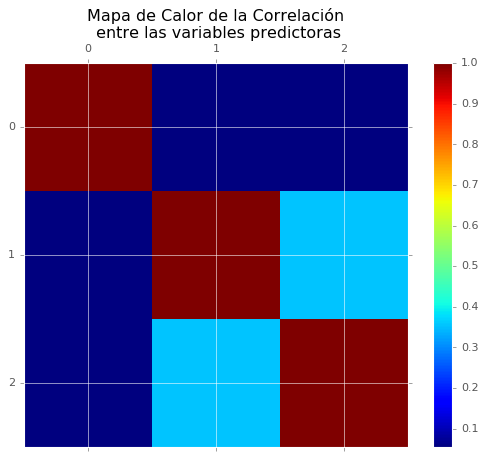

In [47]:
matplotlib.style.use("ggplot")
plt.matshow(corr,fignum=0)
plt.title("Mapa de Calor de la Correlación\n entre las variables predictoras")
plt.colorbar()
plt.show()